In [7]:
#install.packages("car")
#install.packages("gridExtra")
library(car)
library(tidyverse)
library(gridExtra)

In [15]:
data <- read.csv("insurance.csv")

In [19]:
head(data)

age,sex,bmi,children,smoker,region,charges
19,female,27.900,0,yes,southwest,16884.924
18,male,33.770,1,no,southeast,1725.552
28,male,33.000,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.471
32,male,28.880,0,no,northwest,3866.855
31,female,25.740,0,no,southeast,3756.622


In [20]:
summary(data)

      age            sex           bmi           children     smoker    
 Min.   :18.00   female:662   Min.   :15.96   Min.   :0.000   no :1064  
 1st Qu.:27.00   male  :676   1st Qu.:26.30   1st Qu.:0.000   yes: 274  
 Median :39.00                Median :30.40   Median :1.000             
 Mean   :39.21                Mean   :30.66   Mean   :1.095             
 3rd Qu.:51.00                3rd Qu.:34.69   3rd Qu.:2.000             
 Max.   :64.00                Max.   :53.13   Max.   :5.000             
       region       charges     
 northeast:324   Min.   : 1122  
 northwest:325   1st Qu.: 4740  
 southeast:364   Median : 9382  
 southwest:325   Mean   :13270  
                 3rd Qu.:16640  
                 Max.   :63770  

# Details of dataset

Dataset: 1338 observations, 7 variables
To Predict: charges
Predictors: sex, age, bmi, children, region, smoker

We need to predict the medical charges, based on the different attributes which are intutively reasonable

In [23]:
str(data)

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ charges : num  16885 1726 4449 21984 3867 ...


In [25]:
summary(data$sex)
table(as.numeric(data$sex))

female   male 
   662    676


  1   2 
662 676 

In [26]:
summary(data$age)
table(as.numeric(data$age))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   27.00   39.00   39.21   51.00   64.00 


18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 
69 68 29 28 28 28 28 28 28 28 28 27 27 27 26 26 26 25 25 25 25 25 27 27 27 27 
44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 
27 29 29 29 29 28 29 29 29 28 28 26 26 26 25 25 23 23 23 23 22 

In [28]:
summary(data$region)
table(as.numeric(data$region))

northeast northwest southeast southwest 
      324       325       364       325


  1   2   3   4 
324 325 364 325 

In [29]:
summary(data$smoker)
table(as.numeric(data$smoker))

no  yes 
1064  274


   1    2 
1064  274 

In [31]:
ggplot.age = ggplot(data, aes(x = age, y = charges)) + geom_point()

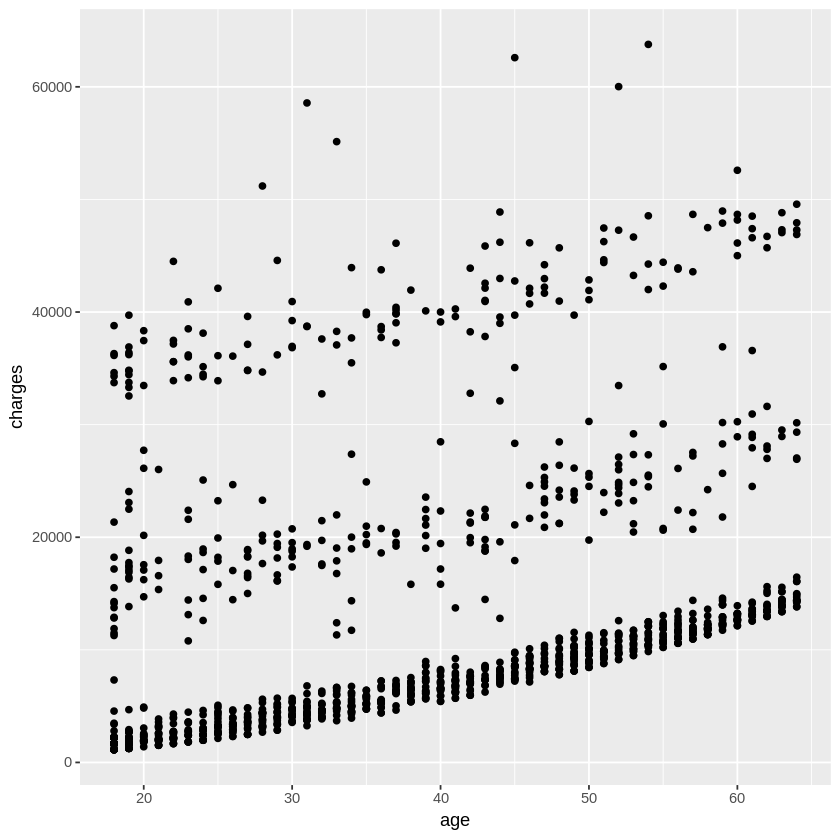

In [32]:
ggplot.age

The above plot demonstrates that there is a positive correlation between the age and charges.
Also notice that people who already start at higher charges continue with increased charges in their later life. There are 3 subgroups too, which we beleive could refer to healthy, people with low defences, people with chronic diseases.

In [44]:
ggplot.bmi <- ggplot(data, aes(x = bmi, y = charges)) + geom_point()

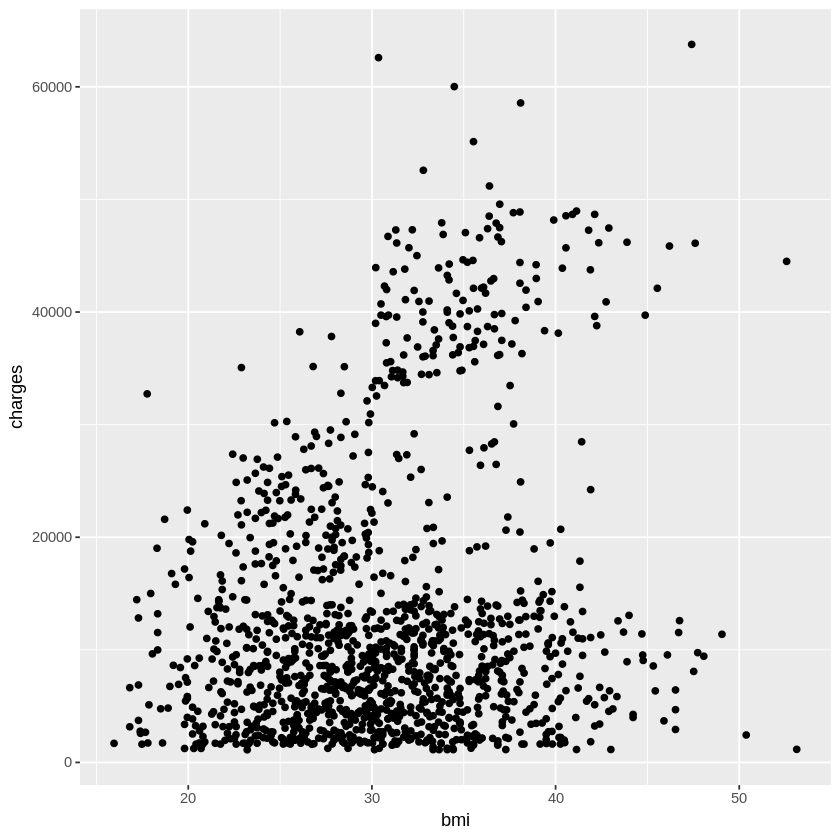

In [45]:
ggplot.bmi

This graph also demonstrates higher charges when bmi increases beyond a certain level

In [46]:
ggplot.sex <- ggplot(data, aes(x = sex, y = charges)) + geom_boxplot()

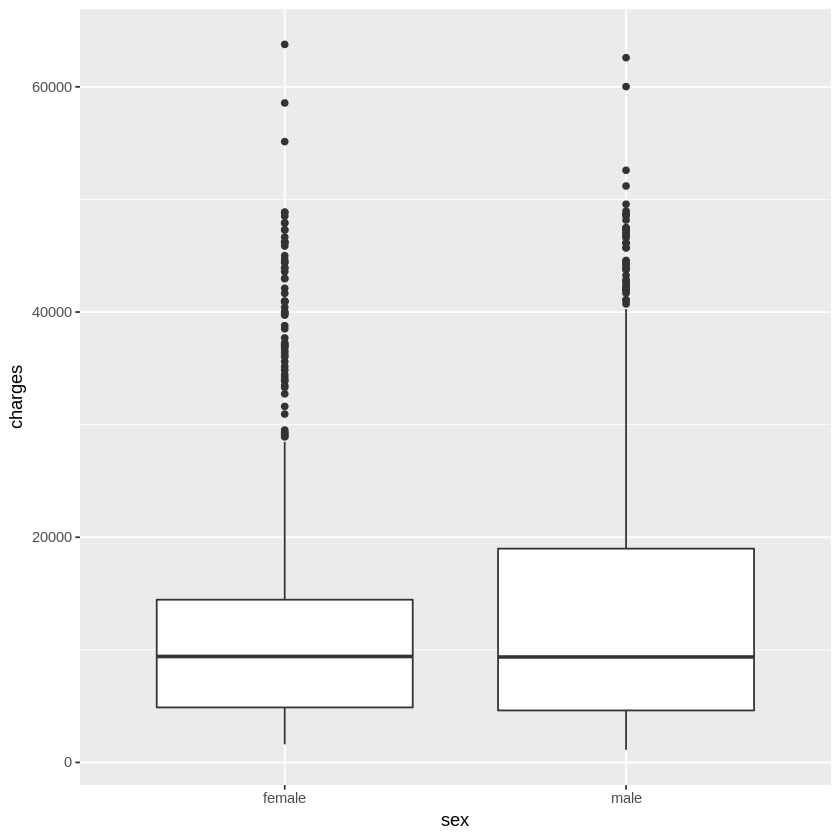

In [47]:
ggplot.sex

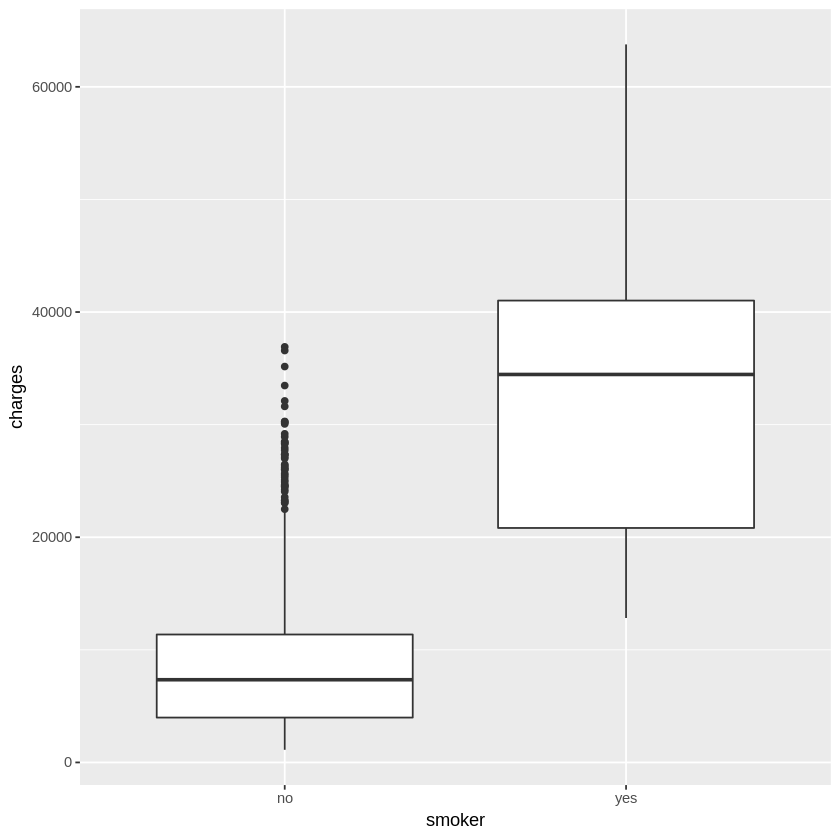

In [48]:
ggplot.smoker <- ggplot(data, aes(x = smoker, y = charges)) + geom_boxplot()
ggplot.smoker

Clearly this issues, that smokers have high insurance needs

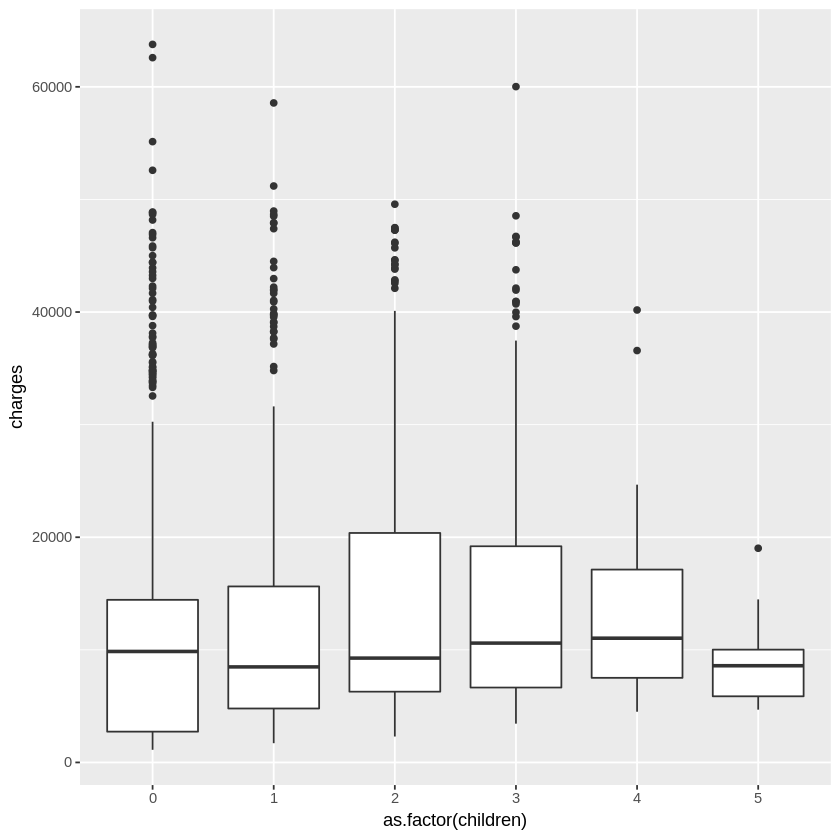

In [49]:
ggplot.child <- ggplot(data, aes(x = as.factor(children), y = charges)) + geom_boxplot()
ggplot.child

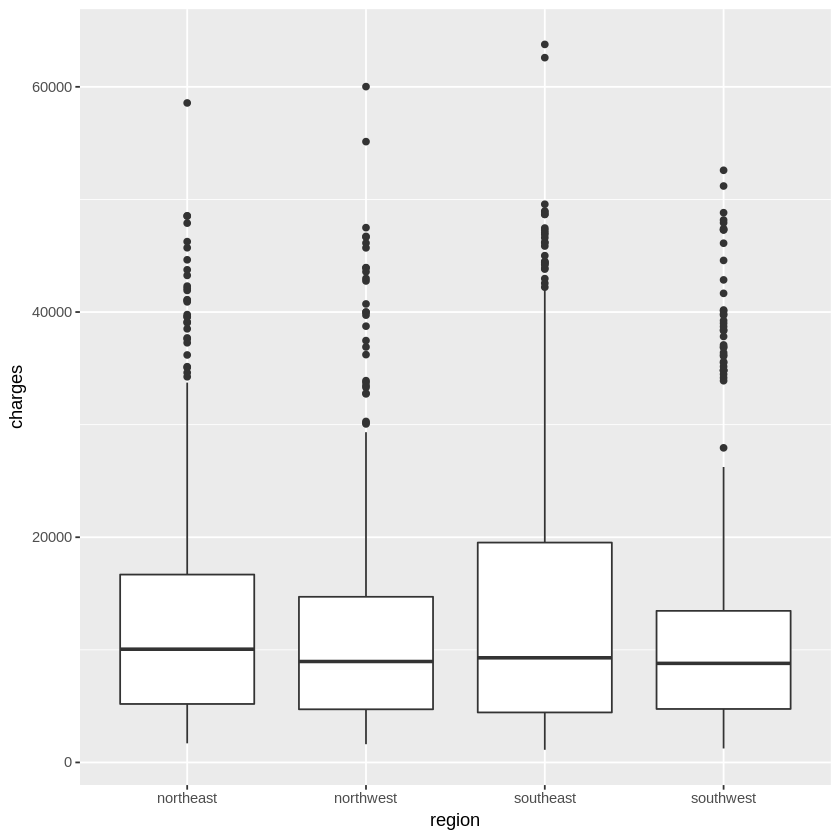

In [51]:
plot.region <- ggplot(data, aes(x = region, y = charges)) + geom_boxplot()
plot.region

# Linear Regression

Linear regression on the input fields


In [52]:
linear_model <- lm(charges ~ age + smoker + bmi + region + sex, data = data)
summary(linear_model)


Call:
lm(formula = charges ~ age + smoker + bmi + region + sex, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11852.6  -3010.9   -987.8   1515.8  29467.1 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11556.96     985.63 -11.725   <2e-16 ***
age                258.54      11.94  21.658   <2e-16 ***
smokeryes        23862.91     414.82  57.526   <2e-16 ***
bmi                340.46      28.71  11.857   <2e-16 ***
regionnorthwest   -304.10     478.01  -0.636   0.5248    
regionsoutheast  -1039.20     480.65  -2.162   0.0308 *  
regionsouthwest   -916.44     479.72  -1.910   0.0563 .  
sexmale           -111.57     334.26  -0.334   0.7386    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6087 on 1330 degrees of freedom
Multiple R-squared:  0.7487,	Adjusted R-squared:  0.7474 
F-statistic:   566 on 7 and 1330 DF,  p-value: < 2.2e-16


### Accuracy for Linear model : 74.87%

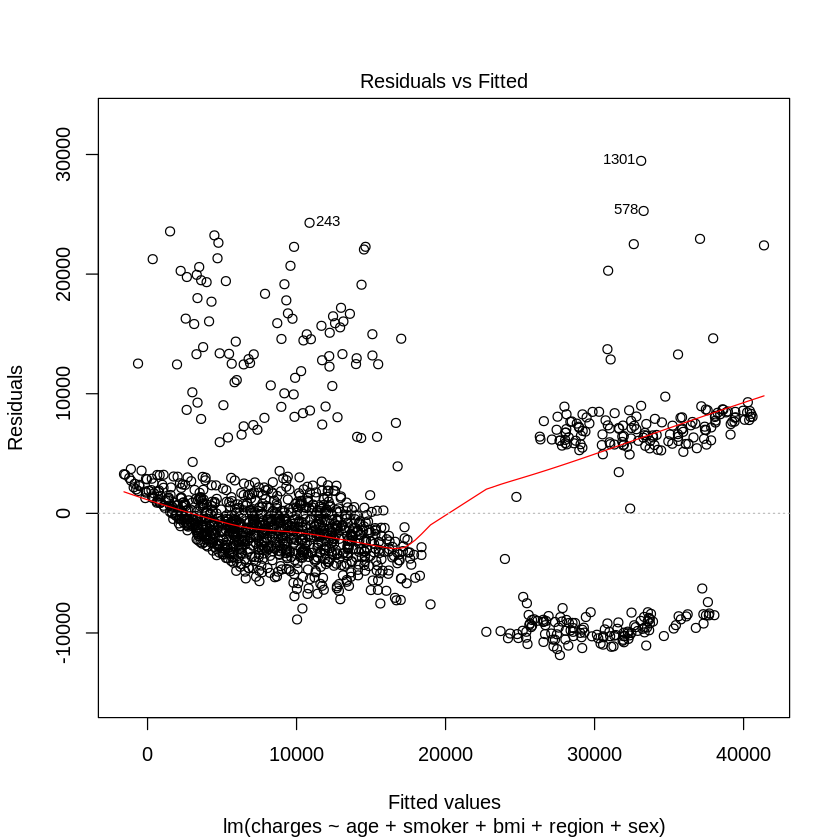

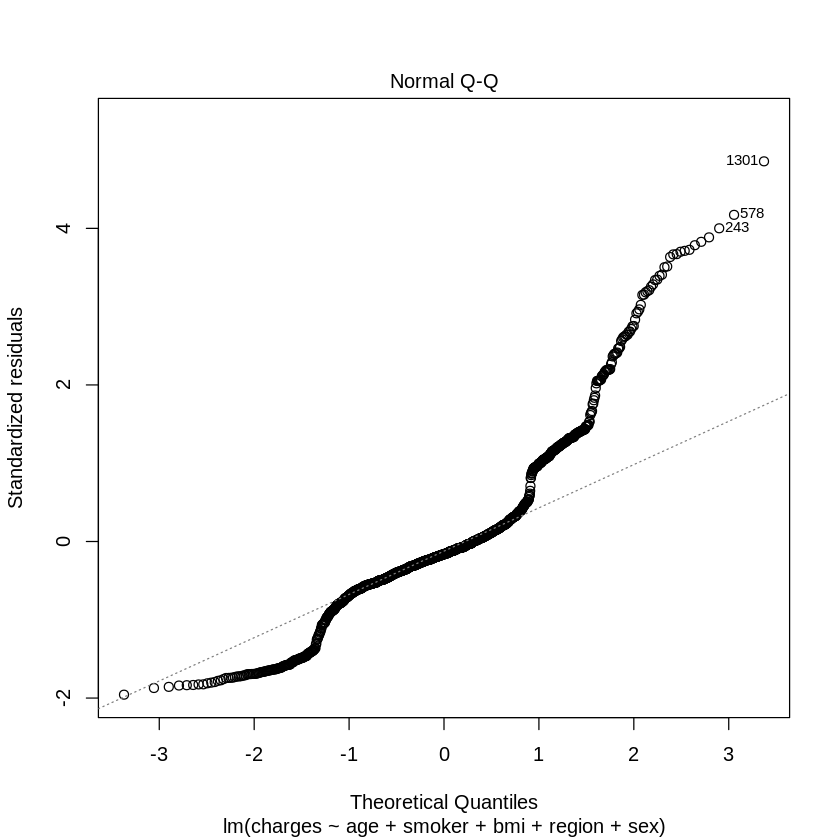

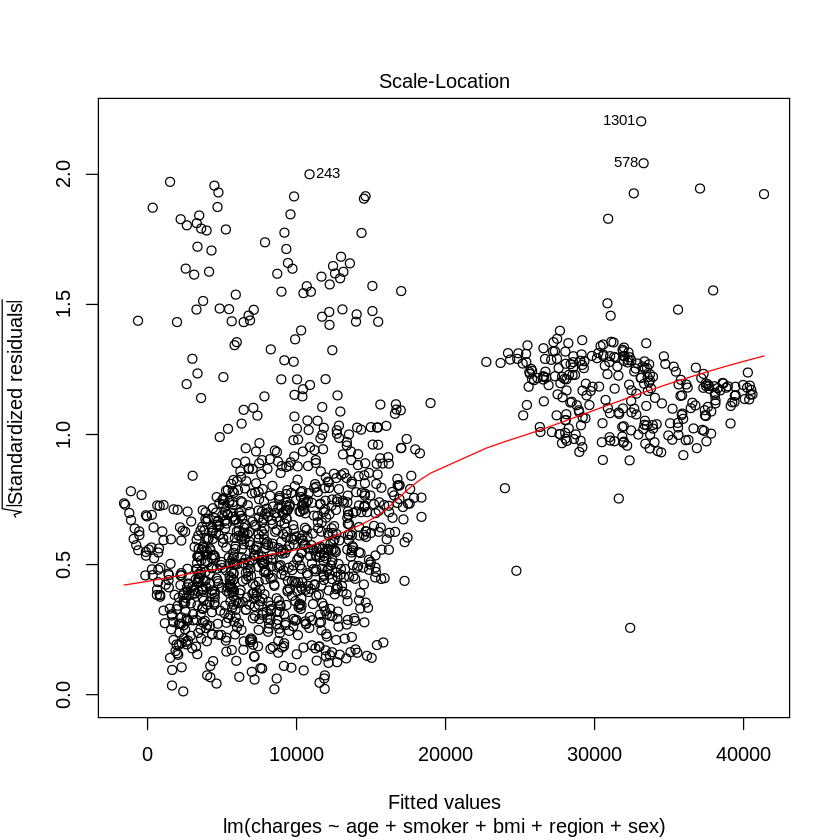

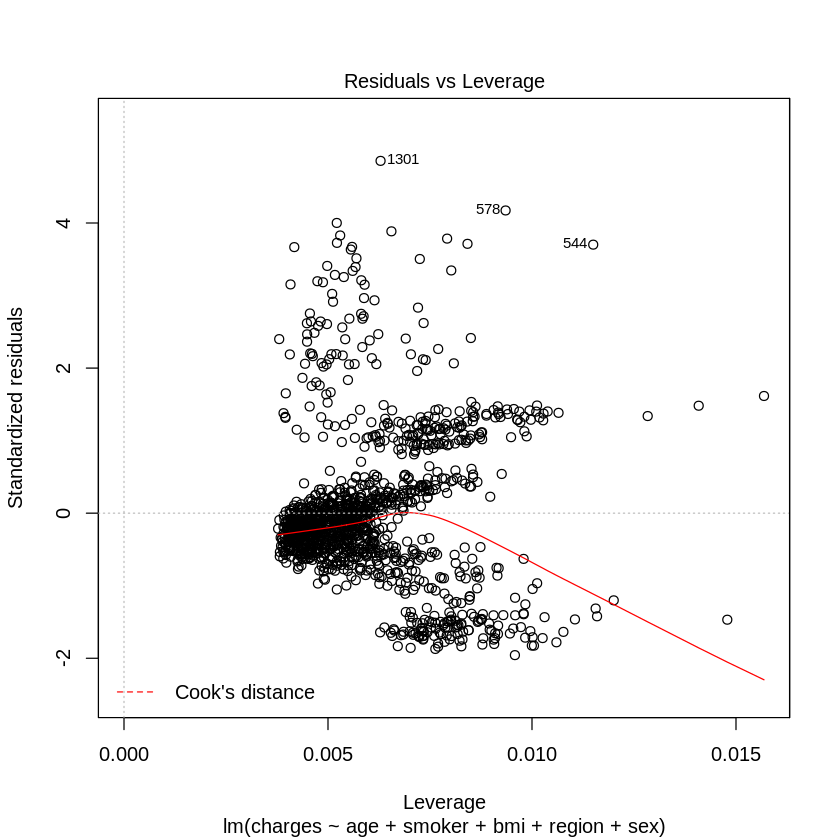

In [53]:
plot(linear_model)

The graphs show that the model we have build is under fitting the dataset, and the dataset involves non linearity.